In [0]:
# Fill in your name using the format below and student ID number
your_name = "van Lith, John"
student_id = "1020757"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml 

     |████████████████████████████████| 163kB 3.3MB/s 


In [4]:
# Uncomment the following line to run in Google Colab
# %tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi John, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
# base_dir = '/content/drive/My Drive/assignment-3-Johnnynater' # For Google Colab
base_dir = 'C:/Users/s165399/Documents/Web Information Retrieval and Data Mining/A3/assignment-3-Johnnynater'

In [8]:
#Uncomment to link Colab notebook to Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
# oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

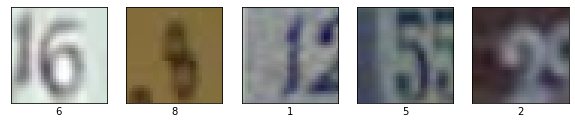

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)    

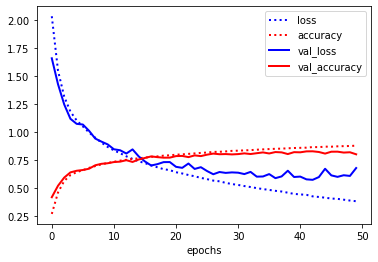

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_model_1_1():
  model = models.Sequential()
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(256, activation='sigmoid'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00025),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=32)
answer_q_1_1 = """Added 6 dense layers where each layer halves in size except for the final layer. 4 layers use ReLU to increase nonlinearity in the network. The 2nd layer with sigmoid as binary classifier gave an overall accuracy increase. The last layer uses softmax for the final classification, because we have 10 classes, which is also why we use CCE as loss function. Optimizer Adam with LR=0.00025 gave the highest accuracy of all optimizers. The model has 87.9% accuracy which is better than the required 70%"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Loading model from file
Success!
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_42 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_44 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_45 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_46 (Dense)    

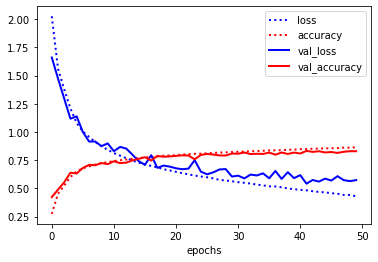

In [17]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(256, activation='sigmoid'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00025),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=32)
answer_q_1_2 = """The model is the same as model_1_1 except that the input shape is now (32,32,1). The model's performance is 1.3% worse than model_1_1. However the validation accuracy seems to be higher whilst only having a third of the original input size, making the use of three dimensions more costly and complex compared to only one dimension. This could imply that color is not necessary for making correct predictions in this context. Also, using color might increase bias generated by color differences."""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_14 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_86 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)

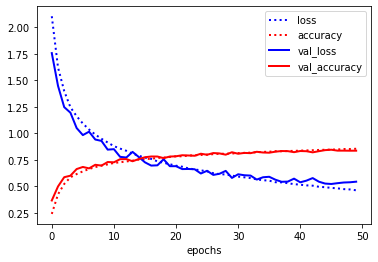

In [18]:
from tensorflow.keras import regularizers

def build_model_1_3():
  model = models.Sequential()
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.05))
  model.add(layers.Dense(256, activation='sigmoid'))
  model.add(layers.Dropout(0.05))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(0.05))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.05))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00025),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model
  
run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=32)
answer_q_1_3 = """I decided to make use of 4 0.05-Dropout layers between the first 5 layers as regularization. Making use of higher Dropouts or the use of other regularizers (e.g. kernel, bias) seemed to only decrease the val_accuracy, possibly because it was too harsh. Its val_accuracy is 1% higher and overfits less, both compared to model_2_2. The increase in accuracy is most likely due to a decrease in the model's complexity that caused it to overfit on the training data. Also, the other accuracy is .9% lower"""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_133 (Conv2D)          (None, 32, 32, 32)        1600      
_________________________________________________________________
batch_normalization_161 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_128 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 16, 16, 64)        100416    
_________________________________________________________________
batch_normalization_162 (Bat (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_94 (Ma

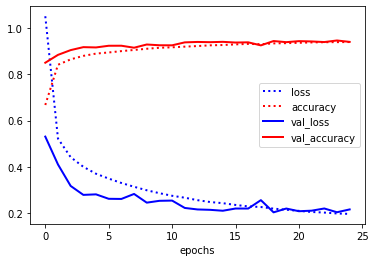

In [19]:
def build_model_2_1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (7, 7), activation='relu', padding='same', input_shape=(32, 32, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(64, (7, 7), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))

  model.add(layers.Conv2D(128, (7, 7), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))

  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.3))

  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=25, batch_size=64)
answer_q_2_1 = """I've implemented 3 convolutional blocks with increasing # of nodes for the conv2D layers. Each conv2D layer has a 7x7 convolution window, which seemed to perform better than any other window I tried. ReLU is used to increase nonlinearity. After a conv2D layer, I normalize the output using a BatchNormalization layer. After that I use maxPooling2D to reduce the size of the feature map whilst still retaining important information. Finally, I use Dropouts to manage additional regularization. After 3 blocks, I flatten the input for the dense layers and I apply softmax for the classification. Batchsize 64 because Adam tends to be erratic with size 32 because of unlucky inputs. Adam gave the highest accuracy of all optimizers. The model works well and does not overfit, with 94.4% val_accuracy."""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        1600      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        100416    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxP

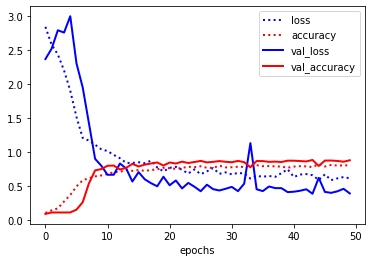

In [20]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
  zoom_range=[0.9, 1.15],
  rotation_range=10,
  width_shift_range=0.01,
  height_shift_range=0.01)
augmented = train_datagen.flow(rgb2gray(X_train), y_train)
augmented_split = augmented, rgb2gray(X_val), y_val

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=False, generator=True, epochs=50, batch_size=None)
answer_q_2_2 = """I implemented [0.9,1.15] zoom, 10 degree rotation range, and 0.01%-width/height shifts. These are the only augmentation that didn't worsen the accuracy to less than 20% and were the only logical transformation for the given data (training on big/small numbers with slight rotation that are not centered). The perfomance at 2x the epochs as 2.1 was still ~6% worse than before. One reason for this could be the capacity of the model, as it still tends to underfit."""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

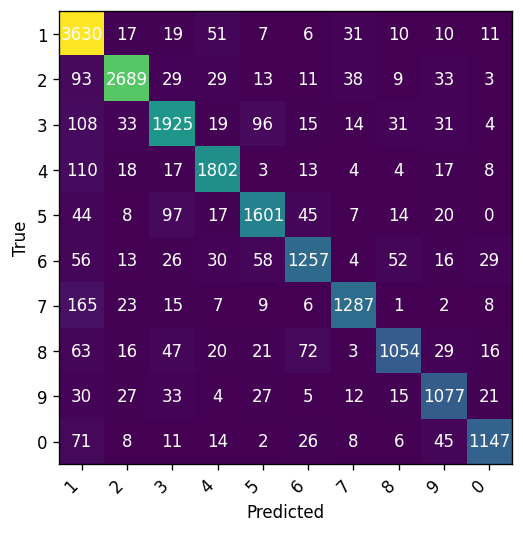

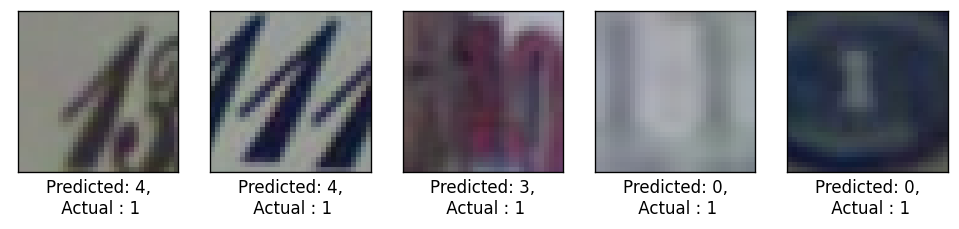

Answer is 789 characters long


In [46]:
from sklearn.metrics import confusion_matrix

model = load_model_from_file(base_dir, "model_2_2")

y_pred = model.predict(rgb2gray(X_test))
misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]

def plot_confusion_matrix():
  cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots(figsize=(5,5))
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "0"]

  ax.set_xticklabels(labels, rotation=45, ha="right")
  ax.set_xlabel('Predicted')

  ax.set_yticklabels(labels)
  ax.set_ylabel('True')
  
  for i in range(100):
      ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

def plot_misclassifications():
  fig, axes = plt.subplots(1, 5, figsize=(10, 5))
  misclassified_ones = []
  for nr, i in enumerate(misclassified_samples):
    if ((np.argmax(y_test[i]) + 1) % 10) == 1:
      misclassified_ones.append(misclassified_samples[nr])

  for nr, i in enumerate(misclassified_ones[:5]):
    axes[nr].imshow(X_test[i])
    axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % ((np.argmax(y_pred[i]) + 1) % 10, (np.argmax(y_test[i]) + 1) % 10))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())

  plt.show()

# Test accuracy = 0.879695840467318
test_accuracy_3_1 = 1 - len(misclassified_samples)/len(X_test)

plot_confusion_matrix()
plot_misclassifications()

answer_q_3_1 = """In most cases the model predicts the correct label. However in some cases there is a significant percentage of incorrect labelings. For example 3 4 and 7 tend to be mislabeled as 1; 8 as 6; and 5 as 3 and vice versa. This misclassification can be due to the image and the presented number itself. Think of difference in fonts, image clarity, rotation, and so on. Take for example the incorrect labeling of 1. It seems that the first 2 misclassifications are due to the font, which makes a 1 resemble a 4 a lot. The 3rd image has a lot of noise and there is a 3 on the right which could have been chosen over the center. The 4th and 5th image are vague, and combining this with the background does make it look like a 0. So these errors are related to font, noisiness, and image background."""
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


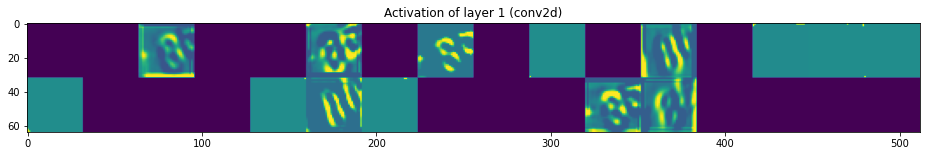

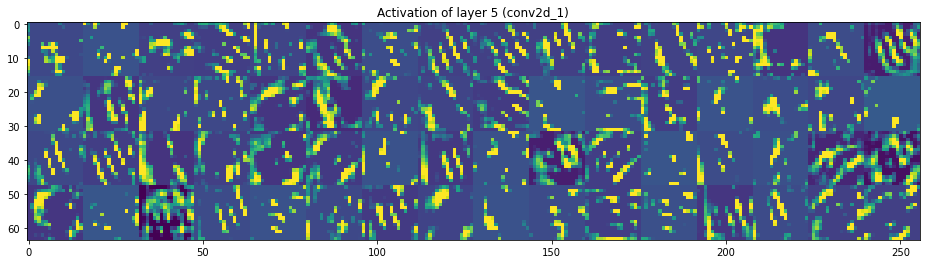

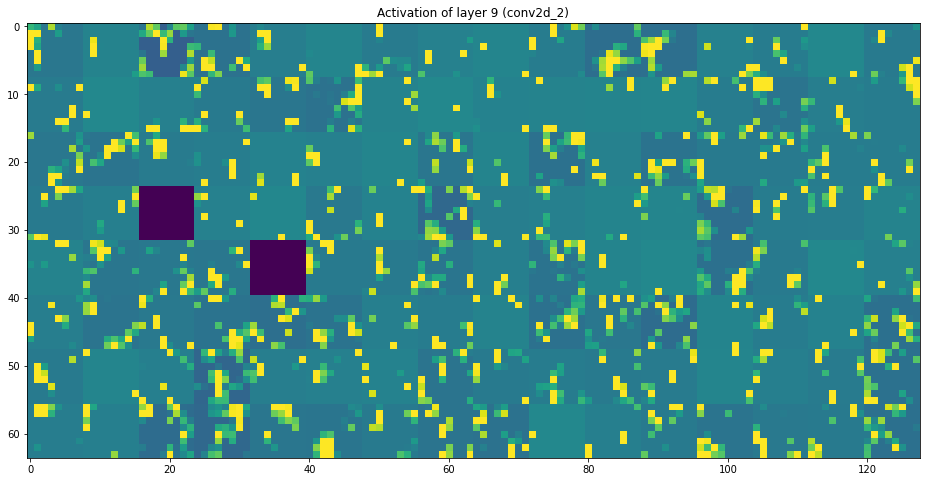

Answer is 498 characters long


In [22]:
# Loads the model from a local file
model = load_model_from_file(base_dir, "model_2_2")

# Converts the test set into a grayscaled version
X_test_gray = rgb2gray(X_test)

# Takes the first image of the grayscaled test set and
# expand its dimension to retrieve its activations
img = X_test_gray[0]
img = np.expand_dims(img, axis=0) 

# Extracts the outputs of all layers
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# This will return a list of arrays, one array per layer activation
activations = activation_model.predict(img)

# Set the amount of images per row
images_per_row = 16

layer_names = []
for layer in model.layers[:15]:
  layer_names.append(layer.name)

def plot_activation_layer(layer_index, activations):
  start = layer_index
  end = layer_index+1
  # Now let's display our feature maps
  for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
      for row in range(images_per_row):
        channel_image = layer_activation[0,
                                        :, :,
                                        col * images_per_row + row]
        # Post-process the feature to make it visually palatable
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size,
                    row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

  plt.show()

def plot_activations():
  # Plot the conv layers
  plot_activation_layer(0, activations)
  plot_activation_layer(4, activations)
  plot_activation_layer(8, activations)

plot_activations()

answer_q_3_2 = """The 1st conv layer retains most of the input image and it's like edge detection is being used here. Many nodes are not active, possibly because the image is too complex for those nodes. The 2nd layer is less interpretable, possibly because it now abstracts from visual information and now slightly converts towards a final classification. The 3rd layer is worse than the second in terms of interpretability. As far as I can interpret the results, it is learning digit patterns from the input image."""
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


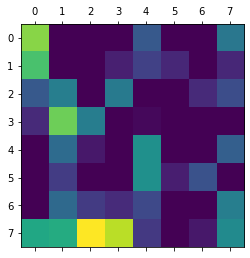

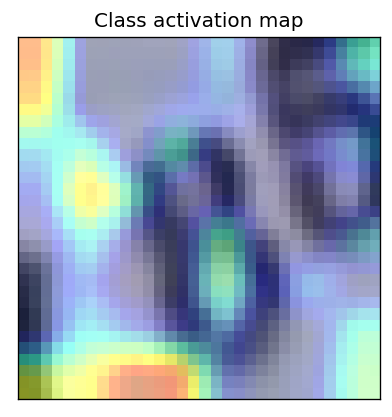

In [23]:
# pip install opencv-python
from tensorflow.keras import backend as K
import cv2

def plot_3_3():
  tf.compat.v1.disable_eager_execution()
  K.clear_session()
  # Loads the model from a local file
  model = load_model_from_file(base_dir, "model_2_2")

  # Extracts the outputs of the last convolutional layer
  output_layer = model.layers[-9]

  # The original image of the first item of the test set
  original_image = X_test[0]

  # Takes the first image of the grayscaled test set and
  # expands its dimension to transform into (1, 32, 32, 1)
  gray_image = rgb2gray(X_test)[0]
  gray_image = np.expand_dims(gray_image, axis=0)

  # Makes the prediction on the gray image
  prediction = model.predict(gray_image)
  
  # Retrieve the output image
  output_image = model.output[:, np.argmax(prediction[0])]
  
  # This is the gradient of output_image class with regard to
  # the output feature map of output_layer
  gradient = K.gradients(output_image, output_layer.output)[0]
  
  # This is a vector of shape (128,), where each entry
  # is the mean intensity of the gradient over a specific feature map channel
  mean_gradient = K.mean(gradient, axis=(0, 1, 2))

  # This function allows us to access the values of the quantities we just defined:
  # `mean_gradient` and the output feature map of output_layer,
  # given a sample image
  iterate = K.function([model.input], [mean_gradient, output_layer.output[0]])
  
  # These are the values of these two quantities, as Numpy arrays
  mean_gradient_val, output_layer_val = iterate([gray_image])

  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the elephant class
  for i in range(mean_gradient.shape[0]):
    output_layer_val[:, :, i] *= mean_gradient_val[i]

  heatmap = np.mean(output_layer_val, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  plt.matshow(heatmap)
  plt.show()

  # Save the first image as png and reload it
  plt.imsave('image_3_3.png', X_test[0])
  image = cv2.imread('image_3_3.png')

  # Resize the heatmap to the same size as the image
  heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))

  # We convert the heatmap to RGB
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  # 0.4 here is a heatmap intensity factor
  superimposed_img = heatmap * 0.4 + image

  # Save the image to disk and reload it
  cv2.imwrite('imposed_3_3.png', superimposed_img)
  img = cv2.imread('imposed_3_3.png')
  RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Plot the image
  plt.rcParams['figure.dpi'] = 120
  plt.imshow(RGB_im)
  plt.title('Class activation map')
  plt.xticks([])
  plt.yticks([])
  plt.show()

plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

58892288/58889256 [==============================] - 1s 0us/step
Loading model from file
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Success!
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                2570      
Total params: 14,848,586
Trainable params: 7,213,322
Non-trainable params: 7,635,264
_________________________________________________________________
None
         lo

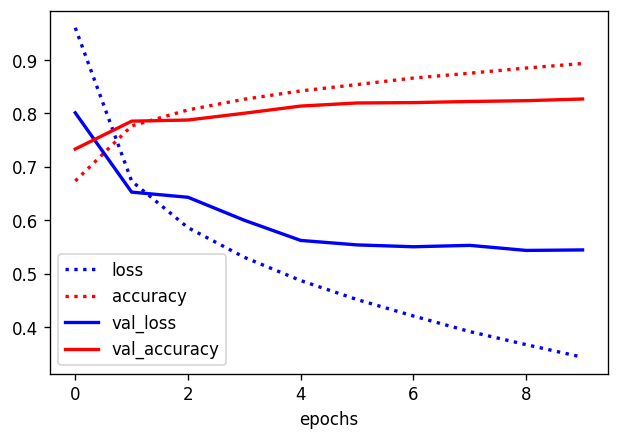

In [24]:
from tensorflow.keras.applications.vgg16 import VGG16

def build_model_4_1():
  model = models.Sequential()
  model.add(VGG16(include_top=False, input_shape=(32,32,3), classes=10, pooling='avg'))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  for layer in model.layers[0].layers[:14]:
    layer.trainable = False
  model.compile(optimizer='adagrad',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model
run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=10, batch_size=32)

answer_q_4_1 = """After 10 epochs the accuracy is at 89% and the validation accuracy at 82.6%. Freezing less blocks result in a higher accuracy, because the pre-trained model will then be trained more on our data rather than making use of its pre-trained data. Observe decent performance even after epoch 1. It starts to overfit after only a few epochs. This is due to the amount of layers that are frozen. These are not able to be trained on with our training dataset."""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [25]:
import pickle
import gzip
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  # Load the model and select the vgg16 layer
  model = load_model_from_file(base_dir, "model_4_1")
  model = model.layers[0]

  # Create embeddings of the train and test set
  result_train = model.predict(X_train)
  result_test = model.predict(X_test)

  # Store embeddings
  store_embedding(result_train, 'result_train')
  store_embedding(result_test, 'result_test')

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  # Implement StandardScaler as preprocessor and RFC as classifier
  steps = [
      ('preprocessor', StandardScaler()),
      ('classifier', RandomForestClassifier(random_state=1))
  ]
  
  # Return the sklearn pipeline
  final_pipe = Pipeline(steps)
  return final_pipe

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  # Fits the pipeline and checks the score on the test data
  pipeline.fit(X_train, y_train)
  return pipeline.score(X_test, y_test)

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  # Stores a boolean on the existence of the embedded data
  embed_train_exists = os.path.isfile(base_dir + '/result_train_embedding.p')
  embed_test_exists = os.path.isfile(base_dir + '/result_test_embedding.p')

  # Creates embedded data if one of them do not exist
  if not(embed_train_exists) or not(embed_test_exists):
    store_embeddings()

  # Load the embedded data
  embed_train = load_embedding('result_train')
  embed_test = load_embedding('result_test')

  # Convert the training labels to actual labels
  y_train_label = [(np.argmax(i) + 1) % 10 for i in y_train]
  y_test_label = [(np.argmax(i) + 1) % 10 for i in y_test]

  # Run evaluate_pipeline
  accuracy = evaluate_pipeline(generate_pipeline(),
                               embed_train,
                               y_train_label,
                               embed_test,
                               y_test_label)
  return accuracy

# Run the evaluation and print the result
accuracy = evaluation_4_2(X_train, y_train, X_test, y_test)
print("Test score: {0}".format(accuracy))

answer_q_4_2 = """Embeddings are made by outputting the last conv layer and storing this data. The pipeline performs StandardScaler preprocessing and then makes use of the default RandomForestClassifier. This is fitted on the embedded training data and then scored on the embedded test data. Labels are transformed to their actual label value, as it increased the performance. The validation accuracy is 82.5% and is almost equal to that of 4.1 (82.7%). My best model (model_2_1) has not been beaten."""
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Test score: 0.8256622016315842
Pipeline: Pipeline(memory=None,
         steps=[('preprocessor',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=1,
                                        verbose=0, warm_start=Fals